In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
N = 400
x = np.random.rand(N) * 8 - 4     # [-4,4)
x = np.random.rand(N) * 4*np.pi     # [-4,4)
x.sort()
print(x)
print('====================')
# y1 = np.sin(x) + 3 + np.random.randn(N) * 0.1
# y2 = np.cos(0.3*x) + np.random.randn(N) * 0.01
# y1 = np.sin(x) + np.random.randn(N) * 0.05
# y2 = np.cos(x) + np.random.randn(N) * 0.1
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N)*0.5
y2 = 13 * np.cos(x) - 5 * np.cos(2*x) - 2 * np.cos(3*x) - np.cos(4*x) + np.random.randn(N)*0.5
np.set_printoptions(suppress=True)
print(y1)
print(y2)
y = np.vstack((y1, y2)).T
print(y)
print('Data = \n', np.vstack((x, y1, y2)).T)
print('=================')
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的

[4.92935526e-03 9.16899145e-02 1.49401148e-01 1.69496219e-01
 2.74981162e-01 3.39912782e-01 4.32749608e-01 4.54183163e-01
 4.68401164e-01 4.83467558e-01 5.17919059e-01 5.58406847e-01
 5.72251179e-01 5.83491924e-01 5.94428787e-01 5.94618929e-01
 6.53139226e-01 6.85517413e-01 7.17916641e-01 7.19055721e-01
 7.20220500e-01 7.35851453e-01 7.52073776e-01 8.39660644e-01
 8.70119458e-01 9.16389674e-01 1.00187088e+00 1.05911709e+00
 1.06042563e+00 1.07071307e+00 1.07260906e+00 1.13029842e+00
 1.17879680e+00 1.18639332e+00 1.19878824e+00 1.21615719e+00
 1.25951907e+00 1.32693551e+00 1.33794161e+00 1.36749137e+00
 1.42481151e+00 1.43275741e+00 1.44624438e+00 1.44840409e+00
 1.46667478e+00 1.47421888e+00 1.47943550e+00 1.49279725e+00
 1.50475494e+00 1.50825169e+00 1.52514594e+00 1.70249221e+00
 1.70730711e+00 1.76332433e+00 1.83405296e+00 2.02053609e+00
 2.04863673e+00 2.06353004e+00 2.10888957e+00 2.11914398e+00
 2.27747372e+00 2.28876980e+00 2.30202001e+00 2.33811053e+00
 2.37480305e+00 2.400493

[[ 0.00492936]
 [ 0.01746048]
 [ 0.02999161]
 [ 0.04252274]
 [ 0.05505387]
 [ 0.067585  ]
 [ 0.08011613]
 [ 0.09264726]
 [ 0.10517839]
 [ 0.11770952]
 [ 0.13024065]
 [ 0.14277178]
 [ 0.15530291]
 [ 0.16783404]
 [ 0.18036517]
 [ 0.1928963 ]
 [ 0.20542743]
 [ 0.21795856]
 [ 0.23048969]
 [ 0.24302082]
 [ 0.25555195]
 [ 0.26808308]
 [ 0.28061421]
 [ 0.29314534]
 [ 0.30567647]
 [ 0.3182076 ]
 [ 0.33073873]
 [ 0.34326986]
 [ 0.35580099]
 [ 0.36833211]
 [ 0.38086324]
 [ 0.39339437]
 [ 0.4059255 ]
 [ 0.41845663]
 [ 0.43098776]
 [ 0.44351889]
 [ 0.45605002]
 [ 0.46858115]
 [ 0.48111228]
 [ 0.49364341]
 [ 0.50617454]
 [ 0.51870567]
 [ 0.5312368 ]
 [ 0.54376793]
 [ 0.55629906]
 [ 0.56883019]
 [ 0.58136132]
 [ 0.59389245]
 [ 0.60642358]
 [ 0.61895471]
 [ 0.63148584]
 [ 0.64401697]
 [ 0.6565481 ]
 [ 0.66907923]
 [ 0.68161036]
 [ 0.69414149]
 [ 0.70667262]
 [ 0.71920374]
 [ 0.73173487]
 [ 0.744266  ]
 [ 0.75679713]
 [ 0.76932826]
 [ 0.78185939]
 [ 0.79439052]
 [ 0.80692165]
 [ 0.81945278]
 [ 0.83198

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


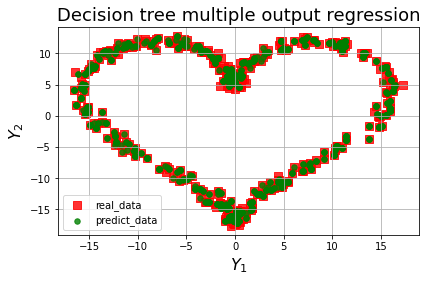

In [3]:
deep = 10
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)

x_test = np.linspace(x.min(), x.max(), num=1000).reshape(-1, 1)
print(x_test)
y_hat = dt.predict(x_test)
print(y_hat)
plt.figure(facecolor='w')
plt.scatter(y[:, 0], y[:, 1], c='r', marker='s', s=60, label=u'real_data', alpha=0.8)
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='o', edgecolors='g', s=30, label=u'predict_data', alpha=0.8)
plt.legend(loc='lower left', fancybox=True)
plt.xlabel('$Y_1$', fontsize=16)
plt.ylabel('$Y_2$', fontsize=16)
plt.grid(b=True)
plt.title('Decision tree multiple output regression', fontsize=18)
plt.tight_layout(1)
plt.show()